# Petit projet sur les statistiques descriptives en utilisant Python et Pandas

Cette étude utilise l'ensemble de données Wine qui peut être téléchargé depuis Kaggle à l'URL suivante:

https://www.kaggle.com/zynicide/wine-reviews

L'étude couvre les sujets suivants :
- Mesures de tendance centrale (moyenne, médiane et mode)
- Mesures de dispersion (étendue, écart-type et variance)
- La connexion entre l'écart-type et les distributions normales
- Distributions uniformes ou aléatoires
- Valeurs aberrantes
- Visualisations de données (histogrammes et boxplots)

In [1]:
# Importation des bibliothèques requises
import pandas as pd
import pylab
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats

In [2]:
# Définir les paramètres pylab par défaut pour afficher les graphiques en ligne et définir la taille de graphique par défaut
%matplotlib inline
pylab.rcParams['figure.figsize'] = (13.0, 5.0)
warnings.filterwarnings('ignore')

#### Charger les données dans un dataframe en utilisant la fonction read_csv et afficher les premières lignes en utilisant la fonction head.

In [3]:
# Charger les données du fichier CSV des vins
wine_df = pd.read_csv('data/winemag-data.csv')
# La ligne suivante peut être utilisée pour supprimer toutes les lignes qui ont des valeurs manquantes.
#wine_df.dropna(inplace=True)
# Afficher les 10 premières lignes du DataFrame des vins
wine_df.head(10)

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
1,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
2,Spain,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
3,Italy,Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
4,France,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
5,US,Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
6,Argentina,Felix,87,30.0,Other,Cafayate,Michael Schachner,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
7,Argentina,Winemaker Selection,87,13.0,Mendoza Province,Mendoza,Michael Schachner,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino
8,Spain,Vendimia Seleccionada Finca Valdelayegua Singl...,87,28.0,Northern Spain,Ribera del Duero,Michael Schachner,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend,Pradorey
9,US,Vin de Maison,87,23.0,Virginia,Virginia,Alexander Peartree,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont


### À quoi ressemblerait la distribution de données aléatoires ?
Lorsque nous traçons des données aléatoires sur un histogramme, cela devrait approximer une distribution uniforme. En d'autres termes, la hauteur de chaque bin devrait être à peu près la même.

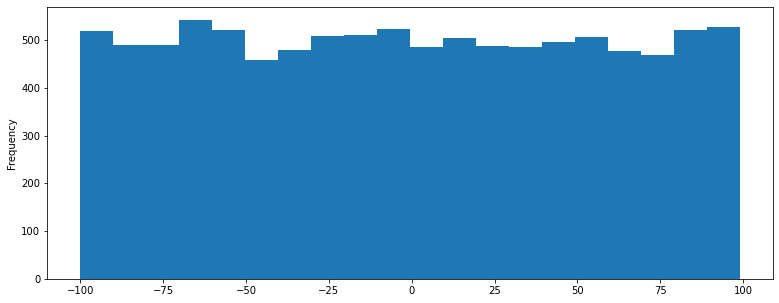

In [4]:
# Créons des données aléatoires et traçons-les en utilisant un histogramme BINS=50.
random_values = np.random.randint(-100, 100, size=(10000))
random_df = pd.DataFrame(random_values, columns=['value'])
random_df['value'].plot(kind='hist', bins=20)
plt.savefig("figs/random_hist.pdf")

### Échantillonnons les valeurs aléatoires?
Le code ci-dessous prend 1000 échantillons de taille 30 et stocke la moyenne de chaque échantillon dans une liste.

In [5]:
sample_size = 30
number_of_samples = 1000
random_means = []
for i in range(number_of_samples):
    random_sample = random_df.sample(n=sample_size)
    random_means.append(random_sample['value'].mean())

### Tracer les moyennes de l'échantillon aléatoire?
Lorsque nous traçons les moyennes des données aléatoires, nous pouvons voir qu'elles approximent une distribution normale. Même si nous savons que les données étaient aléatoires. 

<AxesSubplot:ylabel='Frequency'>

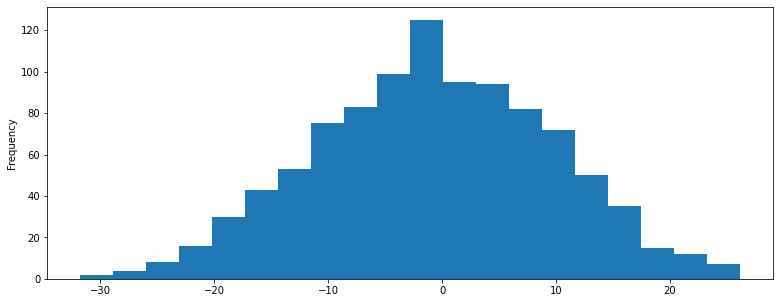

In [6]:
random_means_df = pd.DataFrame(random_means, columns=['value'])
random_means_df['value'].plot(kind='hist', bins=20)


### Ces données sont-elles distribuées normalement ??

In [7]:
alpha = 0.005
k2, p = stats.normaltest(random_means_df['value'])
if p < alpha:  # Hypothèse nulle : l'échantillon provient d'une distribution normale.
    print("L'hypothèse nulle peut être rejetée")
else:
    print("La null hypothèse ne peut pas être rejetée.")

La null hypothèse ne peut pas être rejetée.


### Visualisation des données de prix du vin.
Le code suivant trace les données de prix du vin sur un histogramme. Clairement, les données de prix du vin ne sont pas distribuées normalement.

Text(0.5, 0, 'prix')

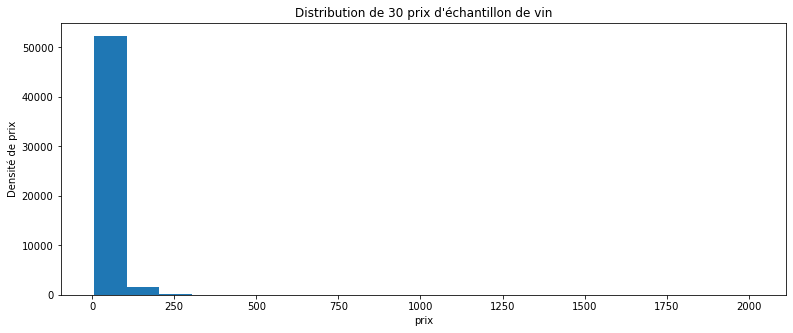

In [8]:
# Traçons les données de prix
ax = wine_df['price'].plot(kind='hist', bins=20)
ax.set_title("Distribution de " + str(sample_size) + " prix d'échantillon de vin")
ax.set_ylabel('Densité de prix')
ax.set_xlabel('prix')

### Prénons quelques échantillons aléatoires supplémentaires des données de prix du vin
Le code ci-dessous prend 10 000 échantillons de taille 100 à partir de l'échantillon de 10 000.

In [9]:
sample_size = 100
number_of_samples = 10000
sample_means = []
for i in range(number_of_samples):
    wine_sample = wine_df.sample(n=sample_size)
    sample_means.append(wine_sample['price'].mean())

### À quoi ressemble la distribution des moyennes?

value    39.180504
dtype: float64


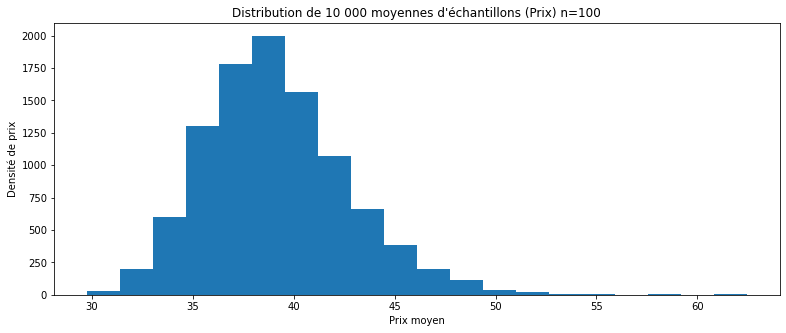

In [10]:
sampled_prices = pd.DataFrame(sample_means, columns=['value'])
ax = sampled_prices['value'].plot(kind='hist', bins=20)
ax.set_title("Distribution de 10 000 moyennes d'échantillons (Prix) n=" + str(sample_size))
ax.set_ylabel('Densité de prix')
ax.set_xlabel('Prix moyen')
plt.savefig("figs/sample_means_price.pdf")
print(sampled_prices.mean())

### Ces données suivent-elles une distribution normale?

In [11]:
alpha = 0.05
k2, p = stats.normaltest(sampled_prices['value'])
if p < alpha:  # Hypothèse nulle : l'échantillon provient d'une distribution normale
    print("L'hypothèse nulle peut être rejetée")
else:
    print("La null hypothèse ne peut pas être rejetée")

L'hypothèse nulle peut être rejetée


### Comparaison de distributions à l'aide d'un t-test
Le code ci-dessous utilise un test t pour vérifier si un échantillon de points de vin a une moyenne similaire à la moyenne de la population (la moyenne de la population est la moyenne de l'ensemble des données)

In [12]:
#Prenez un échantillon de données des vins n = 30
sample_size = 30
wine_sample_df = wine_df.sample(n=sample_size)

# Hypothèse
print("Un échantillon de 30 points de vin aléatoires a une moyenne en ligne avec la moyenne de la population.")

# Moyenne de la population
pop_mean =  wine_df['points'].mean()
# Moyenne de l'échantillon aléatoire n=30
sample_mean = wine_sample_df['points'].mean()

print(""Points moyens de la population " + str(pop_mean) + " Points moyens de l'échantillon" + str(sample_mean))

# Test pour voir si la moyenne de l'échantillon est similaire à la moyenne de la population.
results =  stats.ttest_1samp(wine_sample_df['points'], pop_mean)

print("Score statistique = %.6f Valeur-P = %.6f" % (results.statistic, results.pvalue))
print("Accepter l'hypothèse nulle si la valeur p > 0,05")
print("Sinon, rejetez l'hypothèse nulle et acceptez l'hypothèse alternative.")

if results.pvalue < alpha:  # Hypothèse nulle : la moyenne de l'échantillon est similaire à la moyenne de la population.
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

SyntaxError: invalid syntax (<ipython-input-12-33f0668bb2b9>, line 13)

### Comparaison de distributions à l'aide d'un t-test
"On peut également utiliser un t-test pour vérifier si la moyenne de l'échantillon de points de vin est en ligne avec une moyenne arbitraire, disons 50.

In [13]:
#Prélever un échantillon de l'ensemble des données sur le vin n=30

sample_size = 30
wine_sample_df = wine_df.sample(n=sample_size)

# Hypothesis
print("Sample of 30 random points has mean of 50")

# Random sample mean n=30
sample_mean = wine_sample_df['points'].mean()
print("Sample mean points " + str(sample_mean))

# Test pour voir si la moyenne de l'échantillon est de 50
results =  stats.ttest_1samp(wine_sample_df['points'], 50)

print("Stat score = %.6f P-value = %.6f" % (results.statistic, results.pvalue))
print("Accept NULL hypothesis if p-value > 0.05")
print("Otherwise reject NULL hypothesis and accept alternative")

if results.pvalue < alpha:  # null hypothesis: Sample of 30 random points has mean of 50
    print("L'hypothèse nulle peut être rejetée")
else:
    print("L'hypothèse nulle ne peut pas être rejetée")

Sample of 30 random points has mean of 50
Sample mean points 88.33333333333333
Stat score = 70.031506 P-value = 0.000000
Accept NULL hypothesis if p-value > 0.05
Otherwise reject NULL hypothesis and accept alternative
L'hypothèse nulle peut être rejetée
